# TASK #1: UNDERSTAND THE THEORY AND INTUITION BEHIND CAPITAL ASSET PRICING MODEL (CAPM) 

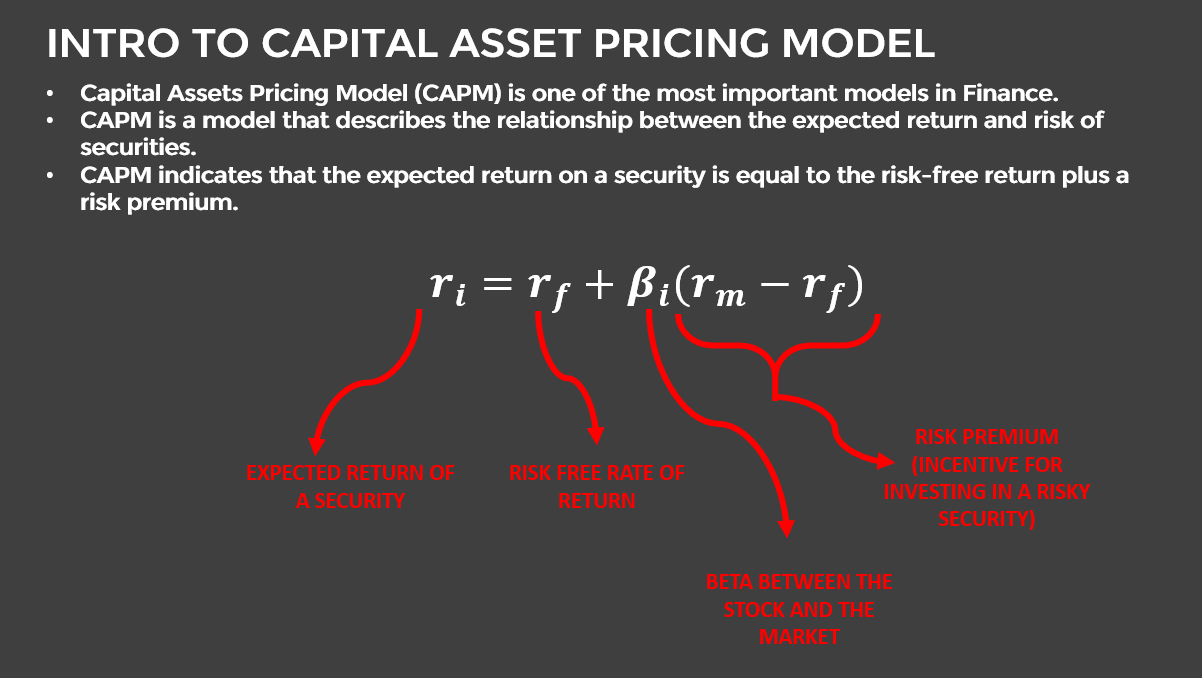

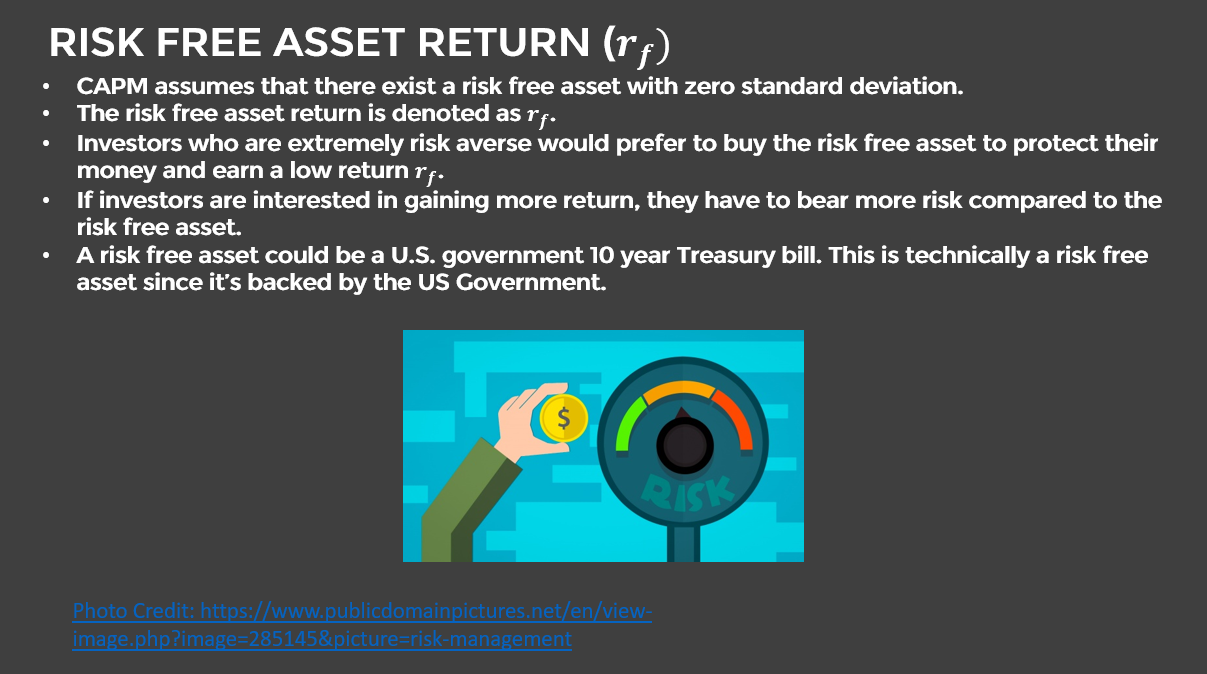

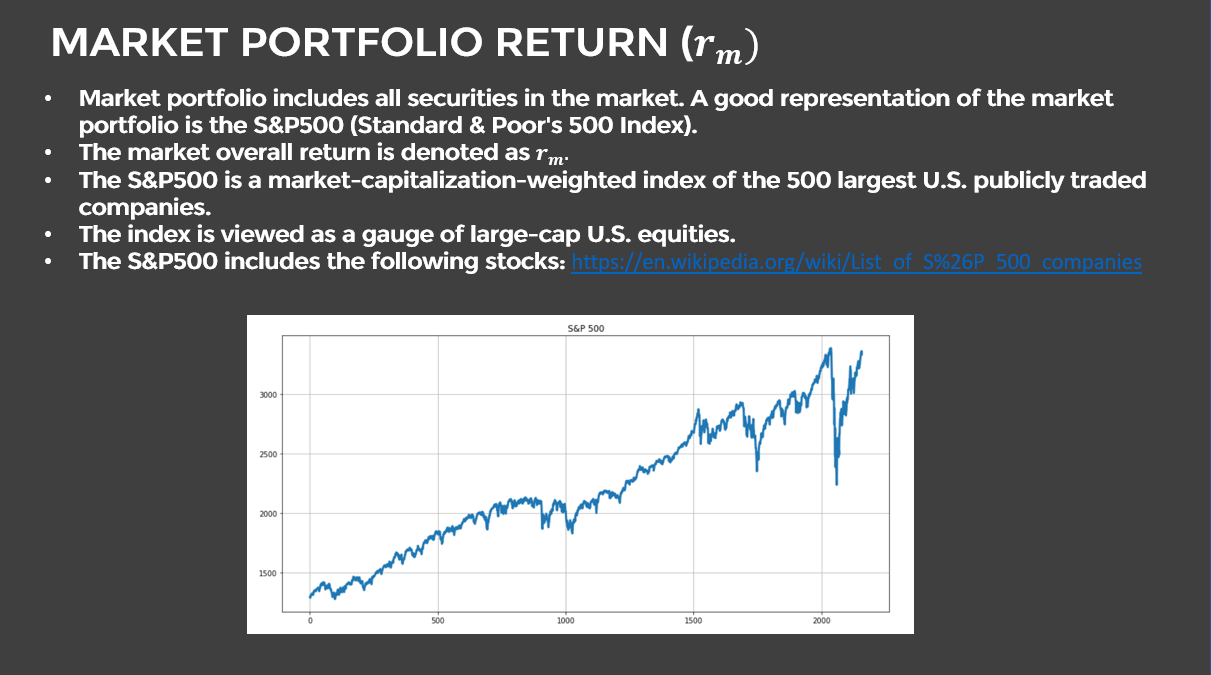

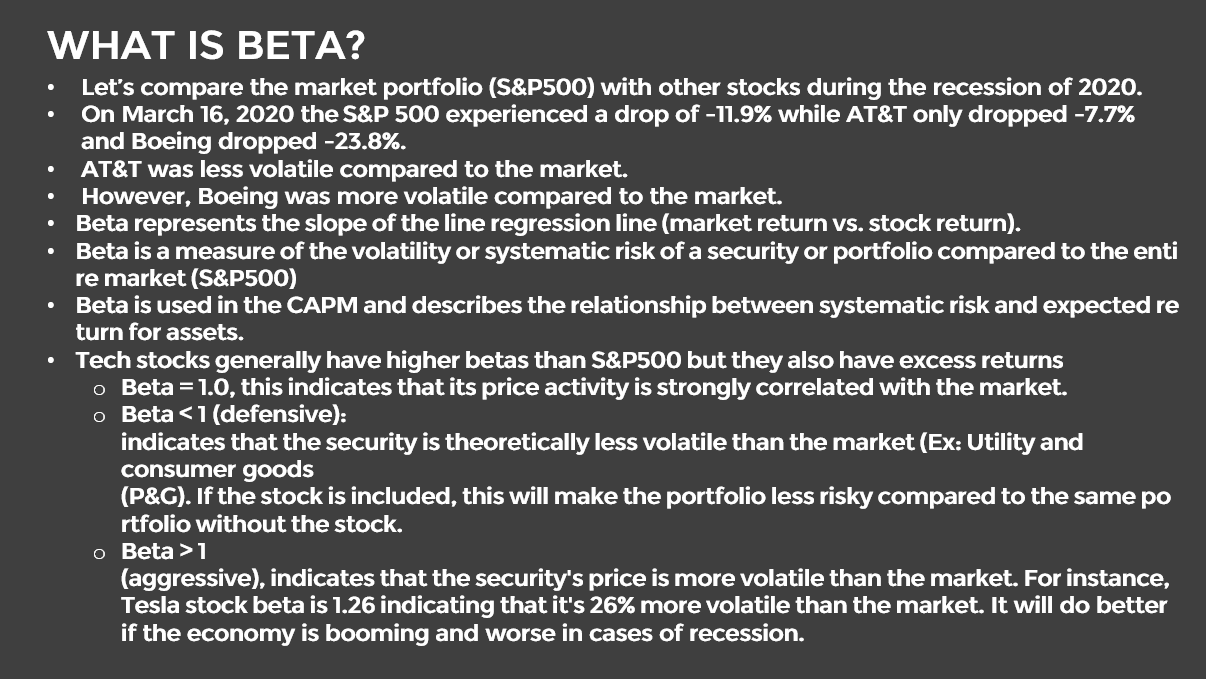

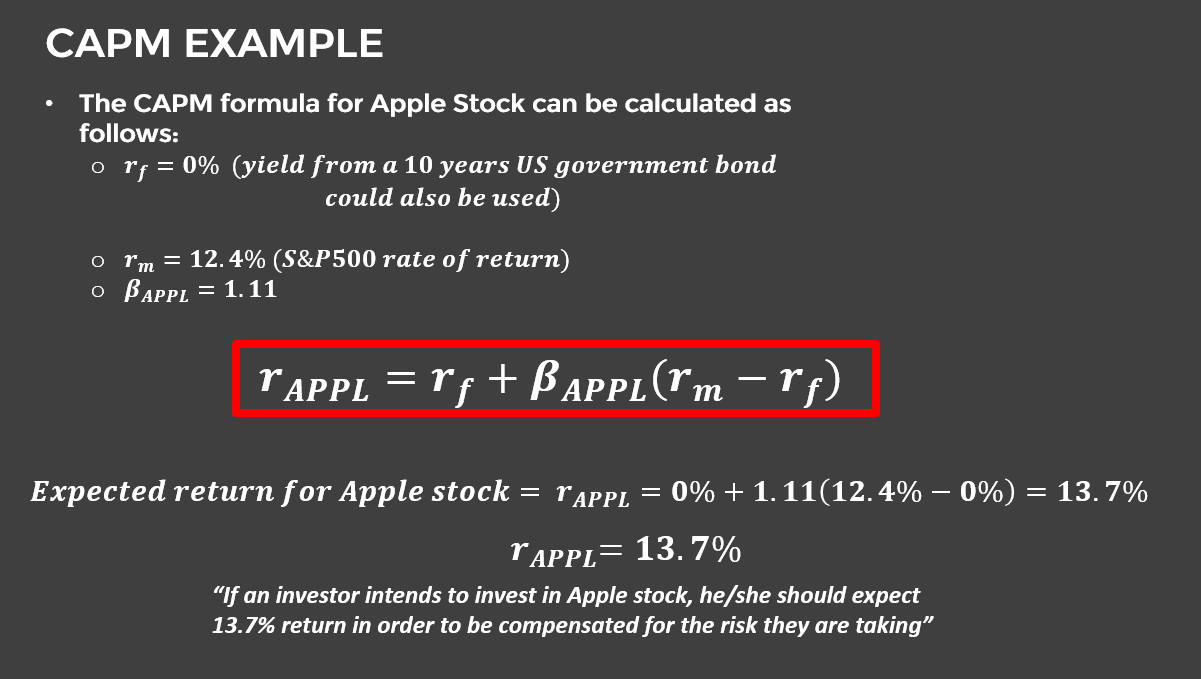

# TASK #2: IMPORT LIBRARIES/DATASETS AND PERFORM EXPLORATORY DATA ANALYSIS

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
from jupyterthemes import jtplot # Jupyter theme
jtplot.style(theme = 'monokai', context= 'notebook', ticks= True, grid= False)

In [3]:
# Read the stock data file


,Date,FB,TWTR,NFLX,BA,T,MGM,TSLA,sp500
0,11/7/2013,47.560001,44.900002,46.694286,131.509995,35.110001,18.580000,139.770004,1747.150024
1,11/8/2013,47.529999,41.650002,47.842857,133.490005,35.169998,19.090000,137.949997,1770.609985
2,11/11/2013,46.200001,42.900002,48.272858,132.529999,35.029999,19.200001,144.699997,1771.890015
3,11/12/2013,46.610001,41.900002,47.675713,132.330002,35.169998,19.260000,137.800003,1767.689941
4,11/13/2013,48.709999,42.599998,47.897144,133.169998,35.070000,19.700001,138.699997,1782.000000
...,...,...,...,...,...,...,...,...,...
1694,8/3/2020,251.960007,36.389999,498.619995,162.270004,29.620001,16.320000,1485.000000,3294.610107
1695,8/4/2020,249.830002,36.349998,509.640015,165.070007,30.010000,16.719999,1487.000000,3306.510010
1696,8/5/2020,249.119995,36.790001,502.109985,174.279999,29.850000,16.719999,1485.020020,3327.770020
1697,8/6/2020,265.279999,37.689999,509.079987,172.199997,29.840000,18.459999,1489.579956,3349.159912


In [4]:
# Getting dataframe info


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1699 entries, 0 to 1698
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1699 non-null   object 
 1   FB      1699 non-null   float64
 2   TWTR    1699 non-null   float64
 3   NFLX    1699 non-null   float64
 4   BA      1699 non-null   float64
 5   T       1699 non-null   float64
 6   MGM     1699 non-null   float64
 7   TSLA    1699 non-null   float64
 8   sp500   1699 non-null   float64
dtypes: float64(8), object(1)
memory usage: 119.6+ KB


MINI CHALLENGE #1: 
- What is the average price of Netflix?
- What is the maximum price for S&P500 stock over the specified time period?
- Hint: Try this out: stocks_df.describe() 

# TASK #3: PERFORM DATA SCALING 

In [5]:
# Function to normalize the prices based on the initial price


MINI CHALLENGE #2:
- If you invested $1000 in NFLX on November 7th, 2013, how much money would you have on Aug 7th, 2020?

# TASK #4: PERFORM DATA VISUALIZATION

In [7]:
# Function to plot interactive plot


In [ ]:
# Plot interactive chart


In [ ]:
# Plot normalized interactive chart


MINI CHALLENGE #3:
- It seems that most stocks experienced massive drops in Q1 of 2020, let's assume that you own 1000 shares of Facebook on Jan 2nd, 2020 and you sold them on March 16th, 2020. How much did you lose (in $)?**

# TASK #5: DEVELOP A FUNCTION TO CALCULATE DAILY RETURNS

In [10]:
# Function to calculate the daily returns 


MINI CHALLENGE #4: 
- Test the "daily_return" function and perform sanity check

# TASK #6: CALCULATE BETA FOR TESLA STOCK

In [14]:
# Select any stock, let's say Apple 


0       0.000000
1      -1.302144
2       4.893077
3      -4.768482
4       0.653116
          ...   
1694    3.790991
1695    0.134680
1696   -0.133153
1697    0.307062
1698   -2.475194
Name: TSLA, Length: 1699, dtype: float64

In [15]:
# Select the S&P500 (Market)


0       0.000000
1       1.342756
2       0.072293
3      -0.237039
4       0.809534
          ...   
1694    0.718102
1695    0.361193
1696    0.642974
1697    0.642770
1698    0.063303
Name: sp500, Length: 1699, dtype: float64

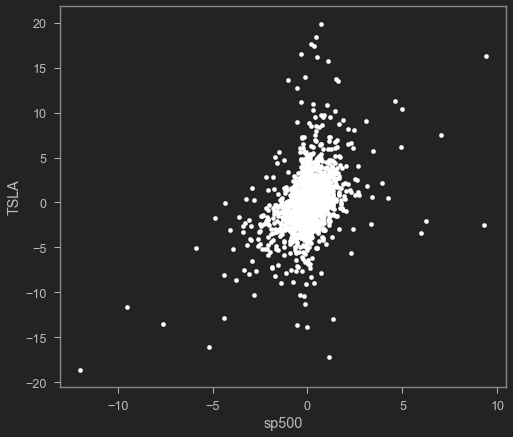

In [16]:
# plot a scatter plot between the selected stock and the S&P500 (Market)


In [17]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('TSLA', beta, alpha))  

Beta for TSLA stock is = 1.2359723602006571 and alpha is = 0.1371620099323686


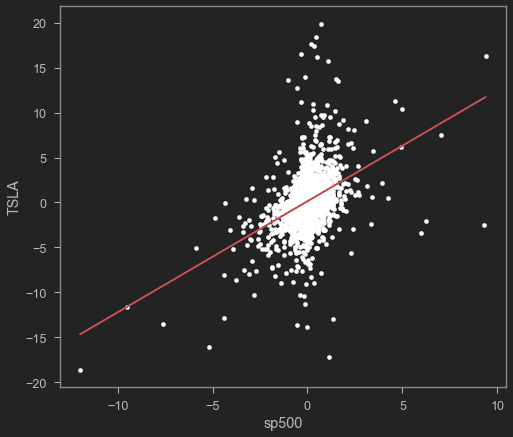

In [18]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA', color = 'w')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


MINI CHALLENGE #5:
- Calculate Beta for MGM Stock

# TASK #7: APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

1.2359723602006571

In [20]:
# Let's calculate the average daily rate of return for S&P500


0.044573617682655095

In [21]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/


11.232551656029084

In [22]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate

# Calculate return for any security (APPL) using CAPM  


13.883123381378068

MINI CHALLENGE #6:
- Apply CAPM formula to calculate the return for Boeing 

# TASK #8: CALCULATE BETA FOR ALL STOCKS

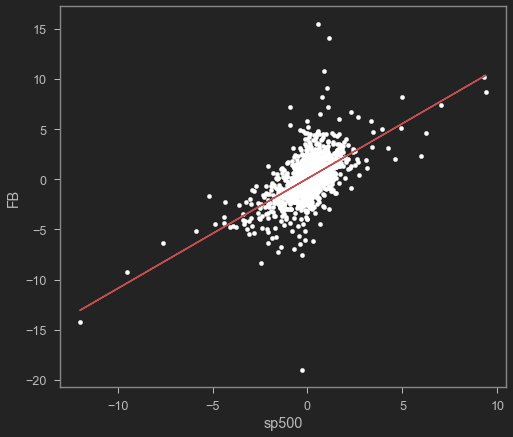

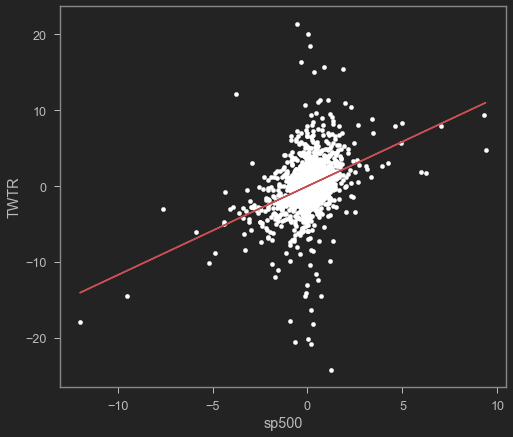

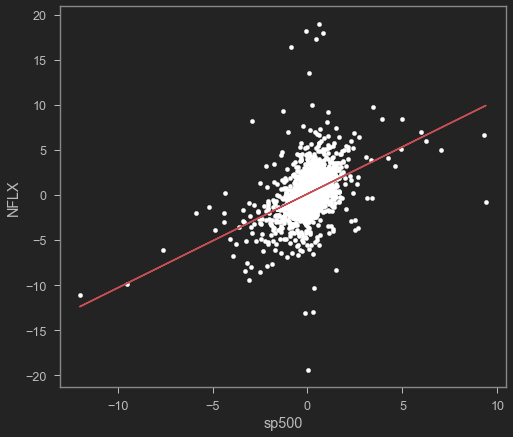

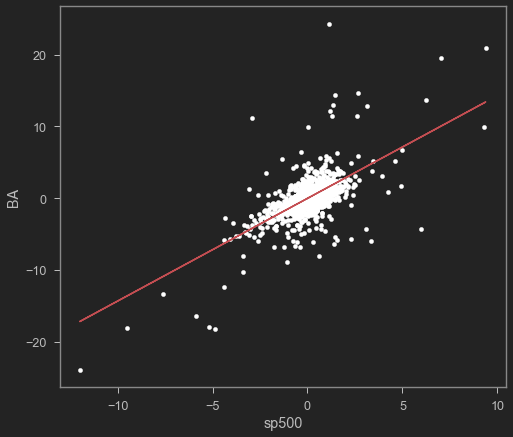

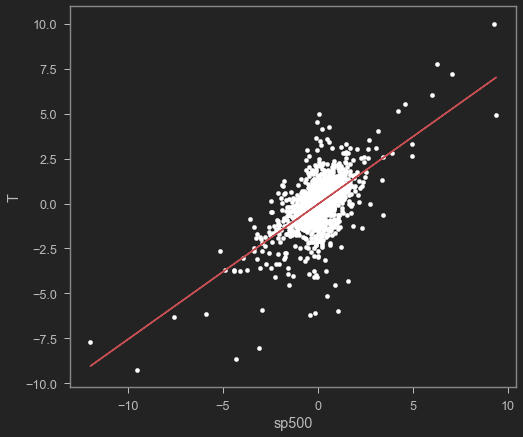

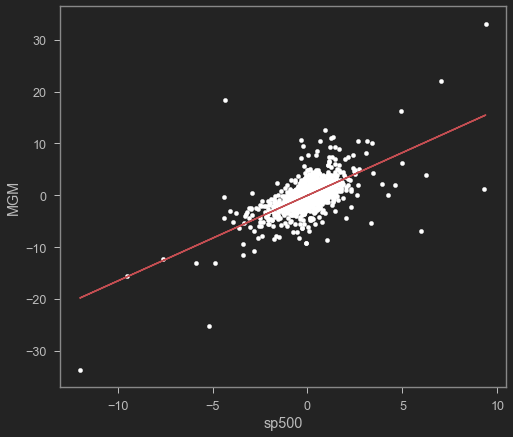

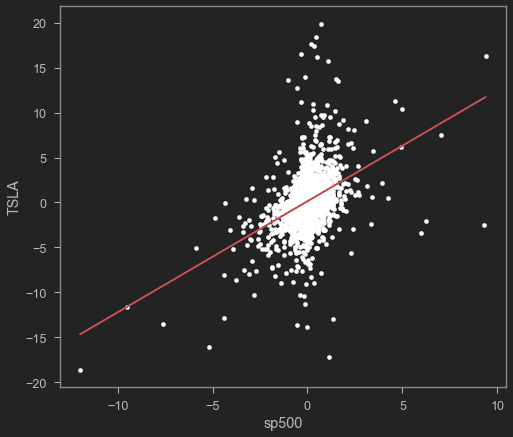

In [24]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i, color = 'w')
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [25]:
# Let's view Beta for every stock 
beta

{'FB': 1.0968490880203248,
 'TWTR': 1.1723596183159934,
 'NFLX': 1.0445724485449468,
 'BA': 1.4304608163084225,
 'T': 0.7523861924715601,
 'MGM': 1.65171241479289,
 'TSLA': 1.2359723602006571}

In [26]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

MINI CHALLENGE #7 (TAKE HOME):
- Download the data for your favourite stock over the past 5 years and perform analysis. 